In [46]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [47]:
import os, sys

In [48]:
mito_code = '/home/falcon/Development/unet-training/a-fully-supervised-unet/'
weights = os.path.join(mito_code, 'models/jain/weights.675.hdf5')

In [49]:
sys.path.append(mito_code)
import data_management
from data_management import load_stack
from data_management import load_data

import interactive_plot

import metrics
from metrics import statistics
from metrics import confusion_matrix
from metrics import error_distribution
from metrics import error_borders
from metrics import PR_curve

import generator_extended

import unet
from unet import load_model_unet
from unet import predict_net
from unet import get_unet
from unet import train
from unet import execute_predict

In [50]:
import mahotas as mh
from PIL import Image

In [51]:
img_dir = '/home/falcon/Thesis/test-img-newdata1/'
img1 = os.path.join(img_dir, 'mask0000.png')

In [52]:
img = mh.imread(img1)
img = img[0:512, 0:512]
# TODO maybe invert the image
img_inverted = 255 - img

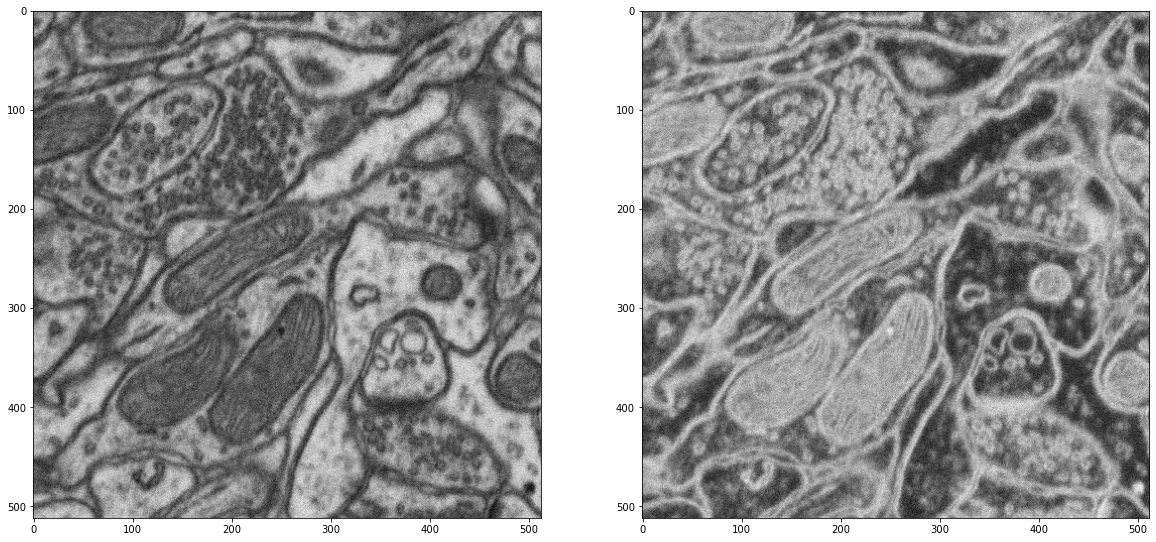

In [53]:
f, images_subplot = plt.subplots(1,2, figsize=(20, 20)) 
images_subplot[0].imshow(img, cmap='gray')
images_subplot[1].imshow(img_inverted, cmap='gray')

In [54]:
# Normalize inverted image
img_inverted_normalized = img_inverted.astype(float)
img_inverted_normalized /= 255

In [55]:
# create copy of normalized image
img_copy = np.zeros((1, img.shape[0], img.shape[1], 1))
img_copy[0,:,:,0] = img_inverted_normalized[:,:]

In [56]:
# create temp image for downsize

# downsize to size
# DOWNSIZE_TO = (512, 512)

# temp_img = Image.fromarray(img_copy[0, :, :, 0])
# temp_img = temp_img.resize((DOWNSIZE_TO[0], DOWNSIZE_TO[1]), resample=Image.NEAREST)

# img_inverted_normalized_resized = numpy.asarray(temp_img)

In [57]:
# create copy of resized image
# img_copy_resized = np.zeros((1, img_inverted_normalized_resized.shape[0], img_inverted_normalized_resized.shape[1], 1))
# img_copy_resized[0,:,:,0] = img_inverted_normalized_resized[:,:]
img_copy_resized = img_copy

In [58]:
# load model
model = load_model_unet(weights)

In [59]:
# predict using model
pred = predict_net(model, img_copy_resized)

1/1 [==============================] - 0s 573us/step


In [60]:
# upsize predicted image to original size
# pred_img = pred[0,:,:,0]
# temp_img = Image.fromarray(pred_img[:, :])
# temp_img = temp_img.resize((img.shape[1],img.shape[0]), resample=Image.NEAREST)
# predicted_img_resized = np.asarray(temp_img)
predicted_img_resized = pred[0,:,:,0]

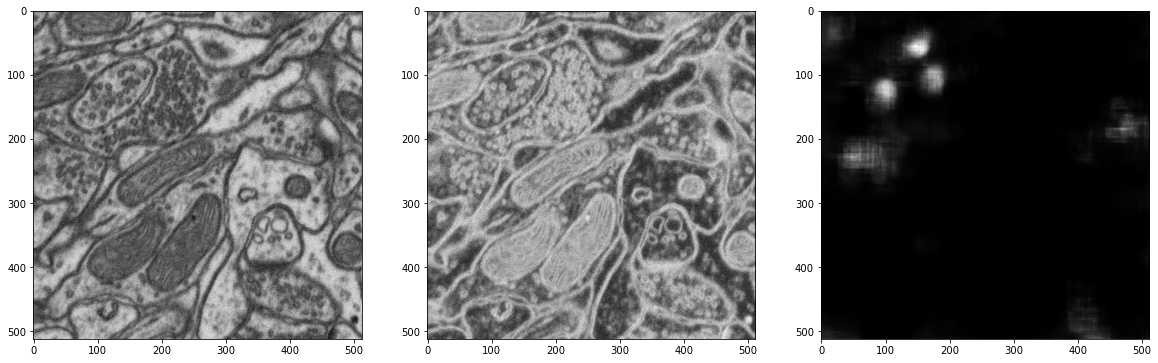

In [61]:
f, images_subplot = plt.subplots(1,3, figsize=(20, 20)) 
images_subplot[0].imshow(img, cmap='gray')
images_subplot[1].imshow(img_inverted, cmap='gray')
images_subplot[2].imshow(predicted_img_resized, cmap='gray')